In [117]:
# Ziel: Basis-Muster in den Zeitreihen zu erkennen (ausdegrückt durch die PCs) 
#       und zu beschreiben, wie stark jede Reihe diesem Muster entspricht

In [10]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.multivariate.pca import PCA

import seaborn as sns

In [105]:
data = sm.datasets.fertility.load_pandas().data
columns = list(map(str, range(1960, 2012)))
data.set_index('Country Name', inplace=True)
data = data[columns]
data = dta.dropna()
data.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,...,1.825,1.805,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690
Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.484,7.321,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395
Angola,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,7.339,...,6.778,6.743,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099
Albania,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,5.160,...,2.195,2.097,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748
United Arab Emirates,6.928,6.910,6.893,6.877,6.861,6.841,6.816,6.783,6.738,6.679,...,2.428,2.329,2.236,2.149,2.071,2.004,1.948,1.903,1.868,1.841


(0, 9)

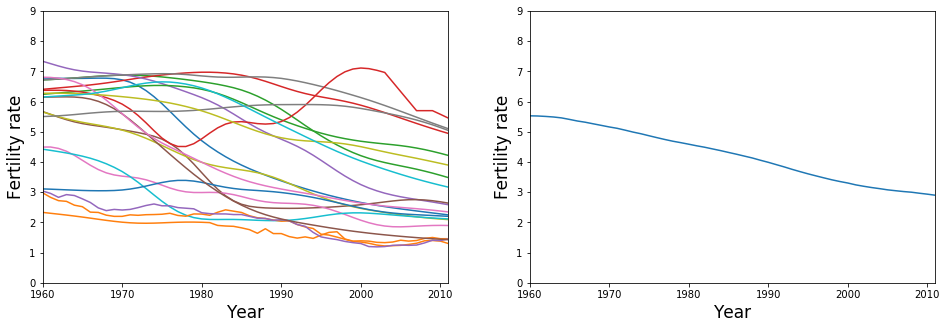

In [106]:
plt.figure(figsize=(16,5))
ax = plt.subplot(1,2,1)
ax.set_xlabel("Year", size=17)
ax.set_ylabel("Fertility rate", size=17);
ax.set_ylim(0, 9)
ax.set_xlim(0, 51)
data.sample(20,random_state=0).T.plot(legend=False, ax=ax)

plt.subplot(1,2,2)
ax = dta.mean().plot(grid=False)
ax.set_xlabel("Year", size=17)
ax.set_ylabel("Fertility rate", size=17);
ax.set_xlim(0, 51)
ax.set_ylim(0, 9)

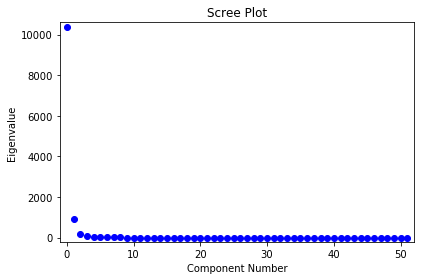

In [107]:
# Objekte = Länder
# Variablen = fertility measures 
#
# Ziel: reduzieren der jährlichen fertility rate auf kleine Anzahl 
#       von "fertility rate profiles" / ""Fertility Rate Basis-Funktionen"
#       welche die meiste der Variation über die Zeit der Länder beschreiben

pca_model = PCA(data.T, standardize=False, demean=True)
fig = pca_model.plot_scree(log_scale=False)

In [108]:
pca_model.factors.iloc[:,0].sort_values().head()


1960   -0.203124
1961   -0.202873
1962   -0.201532
1963   -0.198997
1964   -0.195064
Name: comp_00, dtype: float64

In [109]:
pca_model.factors.iloc[:,1].sort_values().head(20)

1960   -0.243827
1961   -0.236459
1962   -0.225864
1963   -0.212327
1964   -0.195052
1965   -0.171494
2011   -0.168990
2010   -0.161248
2009   -0.151036
1966   -0.146650
2008   -0.143194
2007   -0.132887
2006   -0.123078
1967   -0.117536
2005   -0.112872
2004   -0.103417
2003   -0.091249
1968   -0.089984
2002   -0.078348
2001   -0.064685
Name: comp_01, dtype: float64

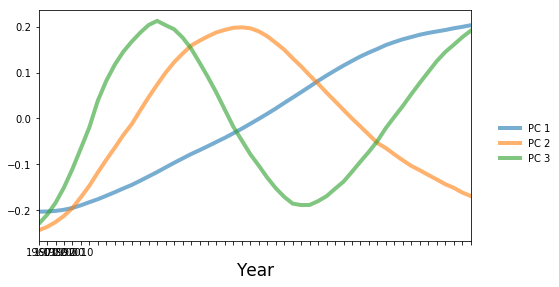

In [110]:
### PCs entlang der Zeitachse

fig, ax = plt.subplots(figsize=(8, 4))

lines = ax.plot(pca_model.factors.iloc[:,:3], lw=4, alpha=.6)

ax.set_xticklabels(dta.columns.values[::10])
ax.set_xlim(0, 51)
ax.set_xlabel("Year", size=17)

fig.subplots_adjust(.1, .1, .85, .9)
legend = fig.legend(lines, ['PC 1', 'PC 2', 'PC 3'], loc='center right')
legend.draw_frame(False)

# PC1 = dominanter faktor steigt monoton!
# => länder mit postivem score auf erstem Faktor werden schneller wachsen als der Mittelwert (und andersrum)
# PC2 =  U-Formm mit postive spitze um 1985 
# => länder mit positvem Wert auf zweiten Faktor haben geringere als mittlere fertility zu Begin und zum Ende und höher in der Mitte
    

In [111]:
def make_plot(labels):
    fig, ax = plt.subplots(figsize=(9,5))
    ax = dta.loc[labels].T.plot(legend=False, grid=False, ax=ax)
    dta.mean().plot(ax=ax, grid=False, label='Mean')
    ax.set_xlim(0, 51);
    fig.subplots_adjust(.1, .1, .75, .9)
    ax.set_xlabel("Year", size=17)
    ax.set_ylabel("Fertility", size=17);
    legend = ax.legend(*ax.get_legend_handles_labels(), loc='center left', bbox_to_anchor=(1, .5))
    legend.draw_frame(False)

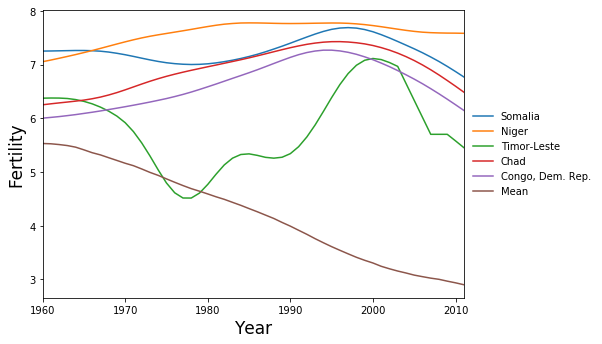

In [112]:
##  5 Länder mit HÖCHSTEM score auf PC1 
# => haben höhere Rate an fertility increase als mittelwert (welcher abnimmt)

idx = pca_model.loadings.iloc[:,0].argsort()
# => loadings - nicht factors!!!

labels = data.index[idx[-5:]]
make_plot(labels)

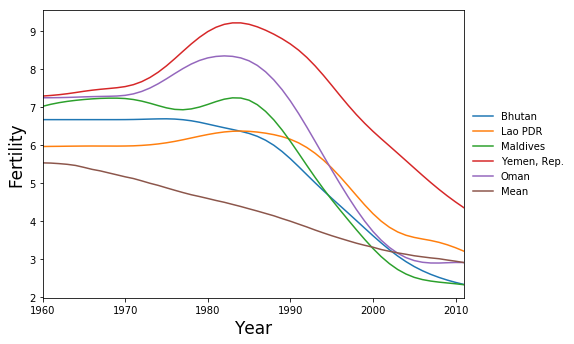

In [113]:
##  5 Länder mit HÖCHSTEM score auf PC2
# => Peak um 1985

idx = pca_model.loadings.iloc[:,1].argsort()
# => loadings - nicht factors!!!

labels = data.index[idx[-5:]]
make_plot(labels)

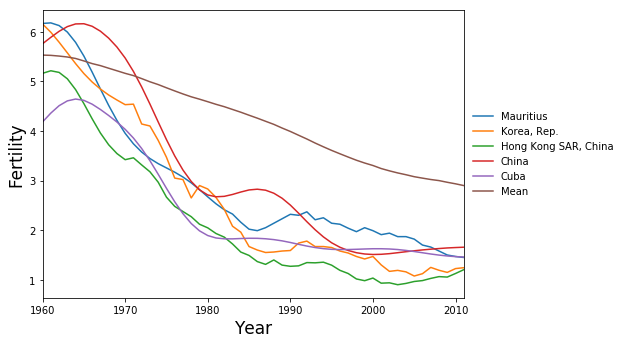

In [115]:
##  5 Länder mit NIEDRIGSTEM score auf PC2

make_plot(data.index[idx[:5]])


Text(0, 0.5, 'PC 2')

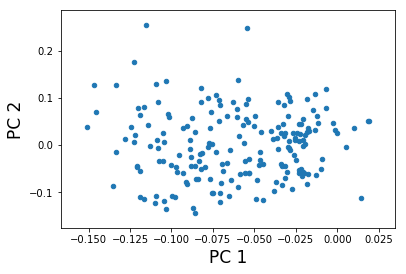

In [94]:
fig, ax = plt.subplots()
pca_model.loadings.plot.scatter(x='comp_00',y='comp_01', ax=ax)
ax.set_xlabel("PC 1", size=17)
ax.set_ylabel("PC 2", size=17)

In [116]:
dta.index[pca_model.loadings.iloc[:, 1] > .2].values
# => Oman', 'Yemen, Rep sind ausreisser - haben scharfen spike um 1980

array(['Oman', 'Yemen, Rep.'], dtype=object)